In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
space_data = pd.read_csv(r"C:\Users\KodavatiGeetanjali\Desktop\ML\spaceship-titanic\train.csv")

In [3]:
space_data.shape

(8693, 14)

In [4]:
space_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
space_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
space_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
space_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [8]:
space_data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

# **EDA**

# Let's find how homeplanet affected the Transported

In [9]:
transported_by_homeplanet = space_data.groupby('HomePlanet')['Transported'].mean()
print(transported_by_homeplanet)

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64


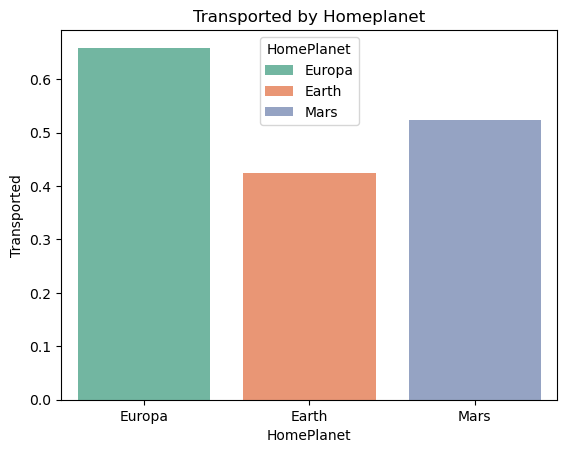

In [10]:
# Lets plot this
plt.figure()
sns.barplot(x='HomePlanet', y='Transported', data=space_data, hue='HomePlanet', errorbar=None, palette='Set2', 
            order=['Europa', 'Earth', 'Mars'])
plt.title('Transported by Homeplanet')
plt.show()

# Let's see how Destination effected the transported

In [11]:
print(space_data.groupby('Destination')['Transported'].mean())

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64


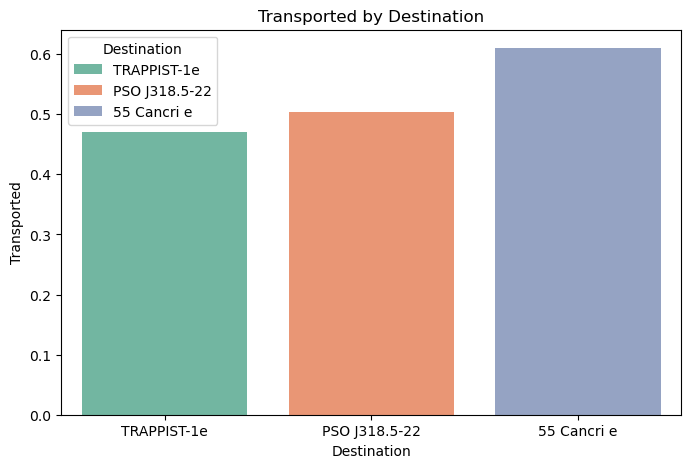

In [12]:
# Let's plot this
plt.figure(figsize=(8,5))
sns.barplot(x='Destination', y='Transported', data=space_data, hue='Destination', errorbar=None, palette='Set2', 
            order=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'])
plt.title('Transported by Destination')
plt.show()

In [13]:
space_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Let's see how CyroSleep effected the Transported

In [14]:
print(space_data.groupby('CryoSleep')['Transported'].mean())

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64


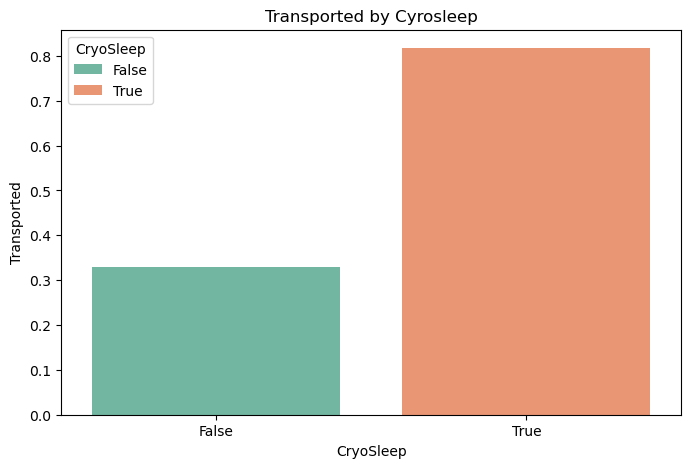

In [15]:
#Lets plot this
plt.figure(figsize=(8,5))
sns.barplot(x='CryoSleep', y='Transported', data=space_data, hue='CryoSleep', palette='Set2', errorbar=None)
plt.title('Transported by Cyrosleep')
plt.show()

# Let's see whether they are VIP or not affected the transported

In [16]:
print(space_data.groupby('VIP')['Transported'].mean())

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64


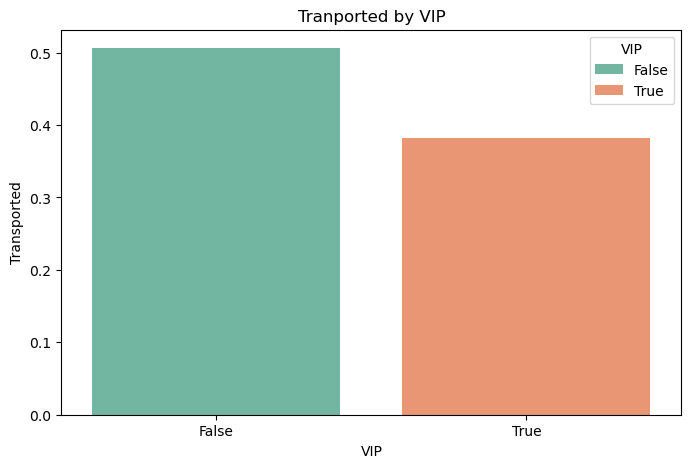

In [17]:
#Lets plot
plt.figure(figsize=(8,5))
sns.barplot(x='VIP', y='Transported', data=space_data, hue='VIP', palette='Set2', errorbar=None)
plt.title('Tranported by VIP')
plt.show()

# Let's see how luxury amenities and age 

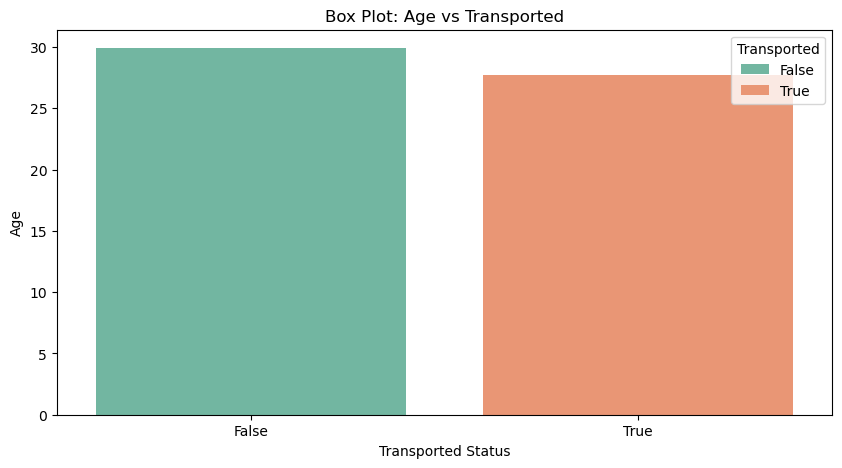

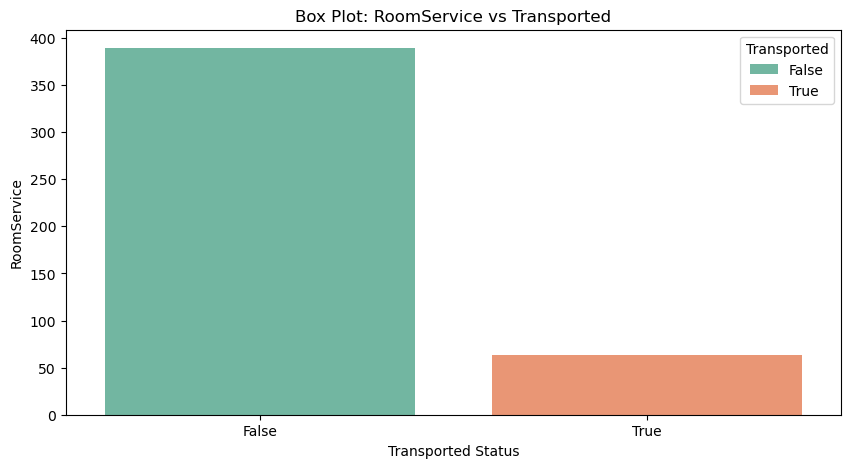

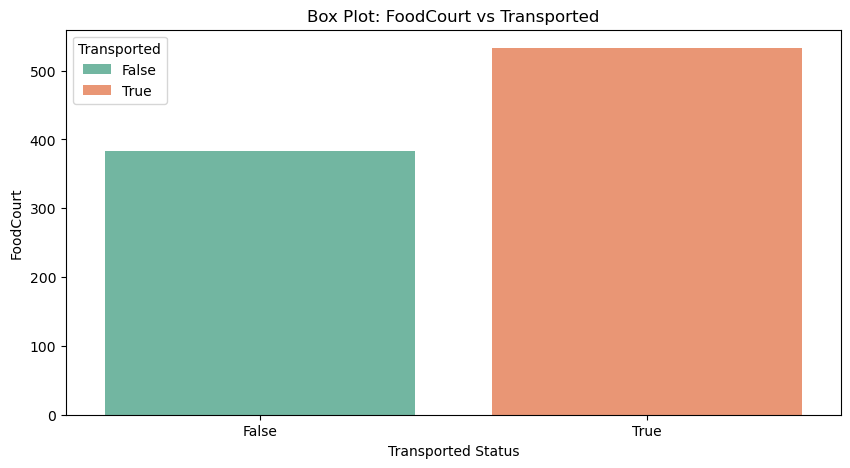

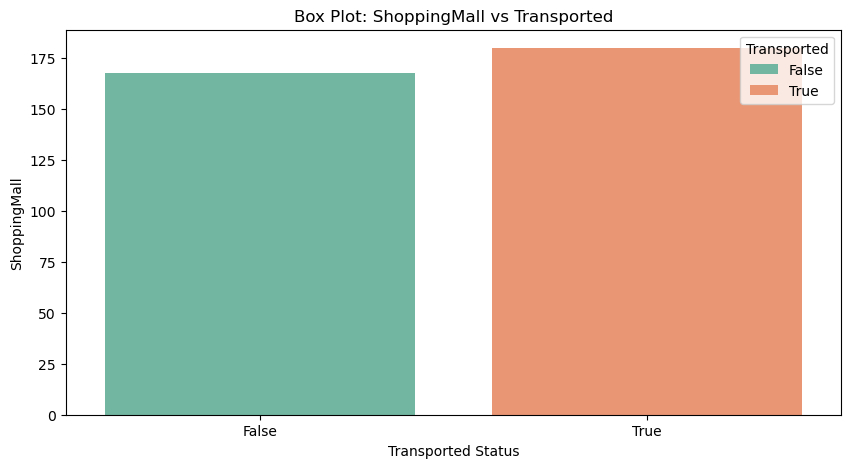

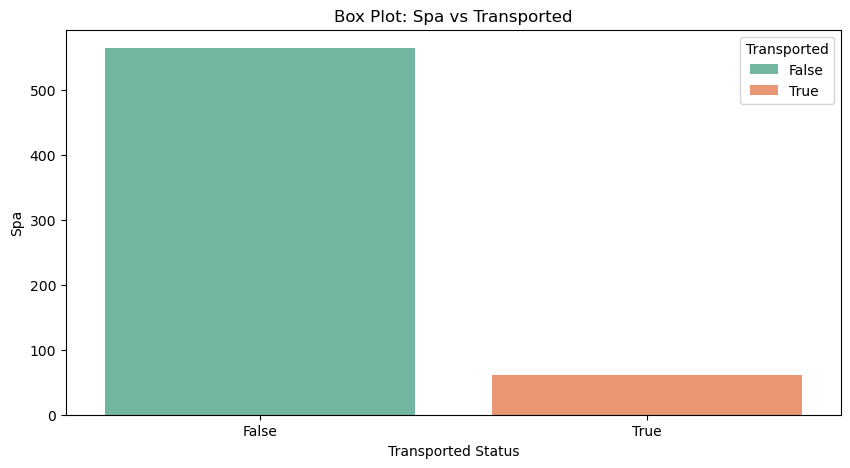

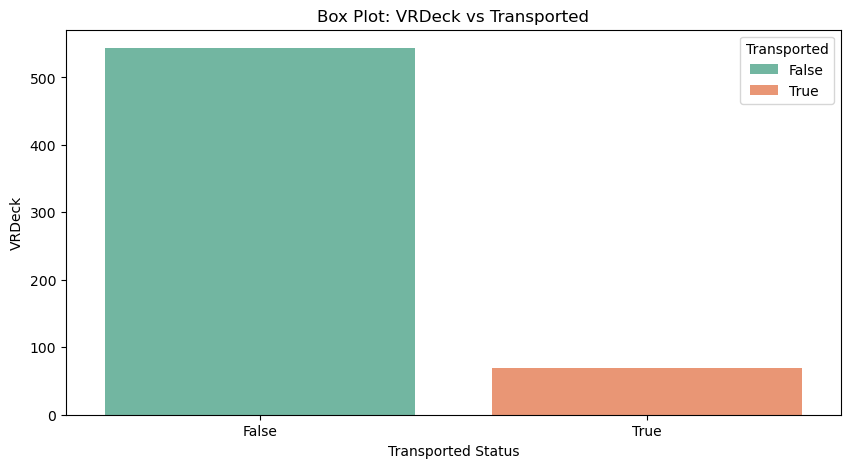

In [18]:
numeric_data = space_data.select_dtypes(include='number')

for column in numeric_data.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Transported', y=column, data=space_data, hue='Transported', palette='Set2', errorbar=None)
    plt.title(f'Box Plot: {column} vs Transported')
    plt.xlabel('Transported Status')
    plt.ylabel(column)
    plt.show()

# Data Preprocessing and Feature Engineering

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [20]:
x = space_data.drop('Transported', axis=1)
y = space_data['Transported']

In [21]:
x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [22]:
x = x.drop(['Name', 'Cabin', 'PassengerId'], axis=1)

In [23]:
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [24]:
x[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = x[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
x.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [25]:
x['Age'].fillna(x['Age'].mean(), inplace=True)
x.isnull().sum().sort_values(ascending=False)

C:\Users\KodavatiGeetanjali\AppData\Local\Temp\ipykernel_2876\1733406041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Age'].fillna(x['Age'].mean(), inplace=True)


HomePlanet      201
Destination     182
RoomService     181
CryoSleep         0
Age               0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [26]:
x['RoomService'] = x['RoomService'].fillna(value=0)
x.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Destination     182
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [27]:
x['HomePlanet'] = x['HomePlanet'].fillna('Unknown')
x['Destination'] = x['Destination'].fillna('Unknown')

x.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
x['HomePlanet'] = encoder.fit_transform(x['HomePlanet'])
x['Destination'] = encoder.fit_transform(x['Destination'])

In [29]:
from sklearn.preprocessing import OneHotEncoder

encder = OneHotEncoder()
x['CryoSleep'] = encoder.fit_transform(x['CryoSleep'])
x['VIP'] = encoder.fit_transform(x['VIP'])

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
dtypes: float64(6), int32(4)
memory usage: 543.4 KB


# Train and Test Split

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Model Selection

In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

def model_selection(model, parameters):
    grid_search = GridSearchCV(model, param_grid=parameters, n_jobs=-1, refit=True, cv=cv)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameter for {model}:", grid_search.best_params_)
    print(f"Best Score for {model}:", grid_search.best_score_)
    preds = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    print("Accuracy:" , accuracy)
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1-score:", f1_score(y_test, preds))

In [33]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
model_selection(RandomForestClassifier(), parameters)

Best Parameter for RandomForestClassifier(): {'max_depth': 10, 'n_estimators': 100}
Best Score for RandomForestClassifier(): 0.7950698438783894
Accuracy: 0.7971625766871165
Precision: 0.7890855457227138
Recall: 0.814927646610815
F1-score: 0.8017984263769202


In [37]:
from sklearn.svm import SVC

parameters = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
model_selection(SVC(), parameters)

Best Parameter for SVC(): {'C': 10, 'gamma': 0.1}
Best Score for SVC(): 0.7390304026294165
Accuracy: 0.7381134969325154
Precision: 0.8040540540540541
Recall: 0.6344249809596344
F1-score: 0.7092379736057897


In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=5)
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
model_selection(log_reg, log_reg_params)

C:\Users\KodavatiGeetanjali\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KodavatiGeetanjali\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KodavatiGeetanjali\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KodavatiGeetanjali\anaconda3\Lib\site-packages\sklearn\linear_

Best Parameter for LogisticRegression(random_state=5): {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score for LogisticRegression(random_state=5): 0.7848808545603944
Accuracy: 0.7963957055214724
Precision: 0.7555555555555555
Recall: 0.8804265041888805
F1-score: 0.8132254660569821


C:\Users\KodavatiGeetanjali\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=5)
dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
model_selection(dt_model, dt_params)

Best Parameter for DecisionTreeClassifier(random_state=5): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Score for DecisionTreeClassifier(random_state=5): 0.7730484798685291
Accuracy: 0.7791411042944786
Precision: 0.7532646048109966
Recall: 0.8347296268088348
F1-score: 0.791907514450867


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=5)
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

model_selection(gb_model, gb_params)

Best Parameter for GradientBoostingClassifier(random_state=5): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best Score for GradientBoostingClassifier(random_state=5): 0.7930977814297453
Accuracy: 0.799079754601227
Precision: 0.7784050811573747
Recall: 0.8400609291698401
F1-score: 0.8080586080586081


In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

model_selection(knn_model, knn_params)

Best Parameter for KNeighborsClassifier(): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score for KNeighborsClassifier(): 0.780279375513558
Accuracy: 0.7776073619631901
Precision: 0.7737117251680359
Recall: 0.789032749428789
F1-score: 0.7812971342383107


In [49]:

from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=5, use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
model_selection(xgb_model, xgb_params)

C:\Users\KodavatiGeetanjali\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:10:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameter for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=5, ...): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, col